<span style="color:#FFA500;font-family: sans serif; font-size:32px;"> SLIMENE RANIA 4 GL F </span>

**<center> <span style="color:#CB4335;font-family:serif; font-size:32px;"> Projet Analyse de données📚📈
</span> </center>**


 **<center> <span style="color:#00008B;font-family:serif; font-size:32px;"> The GitHub History of the Scala Language
</span> </center>**

![Scala-Developer.jpg](https://cdn.educba.com/academy/wp-content/uploads/2021/01/Scala-Developer.jpg)


 <span style="font-family:serif; font-size:28px;"> Plan</span>

1. [Données du dépôt de projets réels de Scala](#1)
   
2. [Préparation et nettoyage des données](#2)  

3. [Fusionner les DataFrames](#3)
4. [Le projet est-il encore activement maintenu](#4)
5. [Y a-t-il de la camaraderie dans le projet ?](#5)
 
6. [Quels sont les fichiers qui ont été modifiés dans les dix dernières pull requests ?](#6)
7. [Qui a fait le plus de pull requests sur un fichier donné ?](#7)
8. [Qui a fait les dix dernières pull requests sur un fichier donné ?](#8)
9.  [ Les pull requests de deux développeurs particuliers](#9)
10. [Visualiser les contributions de chaque développeur](#10)

<a id = "1" ></a>
#  <span style=" color:#FFA500;font-family:serif; font-size:28px;">1.Données du dépôt de projets réels de Scala<span>
<p>Avec près de 30k commits et une histoire qui s'étend sur plus de dix ans, Scala est un langage de programmation mature. C'est un langage de programmation généraliste qui est récemment devenu un autre langage de premier plan pour les data scientists.</p>
<p>Scala est également un projet open source. Les projets open source présentent l'avantage que l'ensemble de leur historique de développement - qui a apporté des modifications, ce qui a été modifié, les revues de code, etc. -- sont accessibles au public. </p>
<p>Nous allons lire, nettoyer et visualiser le dépôt de projets Scala du monde réel qui englobe les données d'un système de contrôle de version (Git) ainsi que d'un site d'hébergement de projets (GitHub). Nous découvrirons qui a eu le plus d'influence sur son développement et qui sont les experts.</p>
<p>Le jeu de données que nous allons utiliser, qui a été préalablement extrait de GitHub, est composé de trois fichiers :</p>
<ol>
<li><code>pulls_2011-2013.csv</code> contient les informations de base sur les demandes de pull, et s'étend de la fin de l'année 2011 jusqu'à (mais non compris) 2014.s .</li>
<li><code>pulls_2014-2018.csv</code> contient des informations identiques, et s'étend de 2014 à 2018.</li>
<li><code>pull_files.csv</code> contient les fichiers qui ont été modifiés par chaque demande de retrait.</li>
</ol>

In [1]:
import pandas as pd

# Loading in the data

pulls_one =pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files =pd.read_csv('datasets/pull_files.csv')

<a id = "2" ></a>
#  <span style="  color:#FFA500;font-family:serif; font-size:28px;">2. Préparer et nettoyer les données <span>
<p> Tout d'abord, nous devrons combiner les données des deux DataFrames pull distincts.</p>
<p>Ensuite, les données brutes extraites de GitHub contiennent des dates au format ISO8601. Cependant, <code>pandas</code> les importe comme des chaînes de caractères ordinaires. Pour faciliter notre analyse, nous devons convertir les chaînes en thon de Python <code>DateTime</code> objets. <code>DateTime</code>Les objets ont la propriété importante de pouvoir être comparés et triés.</p>
<p>Les heures des demandes de téléchargement sont toutes en UTC (également connu sous le nom de temps universel coordonné). Les heures de livraison, par contre, sont à l'heure locale de l'auteur avec des informations sur le fuseau horaire (nombre d'heures de différence avec l'UTC). Pour faciliter les comparaisons, nous devons convertir toutes les heures en UTC.</p>

In [2]:
# Append pulls_one to pulls_two
pulls =pulls_one.append(pulls_two,ignore_index=True)
# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12988\3311470592.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pulls =pulls_one.append(pulls_two,ignore_index=True)


In [3]:
pulls

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00
...,...,...,...
6195,11244241,folone,2014-01-06 09:07:34+00:00
6196,11240674,clhodapp,2014-01-06 03:52:23+00:00
6197,11234757,xeno-by,2014-01-05 12:23:24+00:00
6198,11231462,rklaehn,2014-01-04 22:42:02+00:00


In [4]:
# shape donner le nomber de ligne et colonnes d'un data frame
pulls.shape 

(6200, 3)

In [5]:
##affiche tous les informations de dataframe
pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     6200 non-null   int64              
 1   user    6200 non-null   object             
 2   date    6200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 145.4+ KB


In [9]:
pulls.isna().sum()

pid     0
user    0
date    0
dtype: int64

> **Pas de champs null dans le dataset!**

In [10]:
pulls.head(10)

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00
5,11130874,Ichoran,2013-12-29 16:03:55+00:00
6,11129556,rklaehn,2013-12-29 10:15:46+00:00
7,11126653,xeno-by,2013-12-28 19:39:23+00:00
8,11126070,OlivierBlanvillain,2013-12-28 17:32:51+00:00
9,11121557,xeno-by,2013-12-27 23:50:56+00:00


<a id = "3" ></a>
# <span style="  color:#FFA500; font-family:serif; font-size:28px;"> 3.Fusionner les DataFrames </span>
<p>Les données extraites se trouvent dans deux fichiers distincts. La fusion des deux DataFrames nous permettra d'analyser plus facilement les données dans les tâches futures.</p>

In [11]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on ="pid") 


In [12]:
data.tail(5)


,pid,user,date,file
85583,11231462,rklaehn,2014-01-04 22:42:02+00:00,src/library/scala/collection/immutable/HashSet...
85584,11188295,rklaehn,2014-01-02 18:55:33+00:00,src/library/scala/collection/immutable/HashSet...
85585,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253a.scala
85586,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253b.scala
85587,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253c.scala


In [13]:
data.shape

(85588, 4)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 85587
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     85588 non-null  int64              
 1   user    85588 non-null  object             
 2   date    85588 non-null  datetime64[ns, UTC]
 3   file    85588 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 3.3+ MB


<a id = "4" ></a>
# <span style="  color:#FFA500;font-family:serif; font-size:28px;"> 4. Le projet est-il toujours activement maintenu ?</span>


<p>L'activité d'un projet open source n'est pas très régulière. Certains projets peuvent être actifs pendant de nombreuses années après la publication initiale, tandis que d'autres peuvent lentement tomber dans l'oubli. Avant de s'engager à contribuer à un projet, il est important de comprendre l'état du projet. Le développement se poursuit-il de manière régulière ou y a-t-il une baisse ? Le projet a-t-il été complètement abandonné ?</p>
<p>Les données utilisées dans ce projet ont été collectées en janvier 2018. Nous nous intéressons à l'évolution du nombre de contributions jusqu'à cette date.</p>
<p>Pour Scala, nous allons faire cela en traçant un graphique de l'activité du projet. Nous calculerons le nombre de pull requests soumises chaque mois (calendrier) pendant la durée de vie du projet. Nous tracerons ensuite ces chiffres pour voir la tendance des contributions.</p>


<AxesSubplot:xlabel='month,year'>

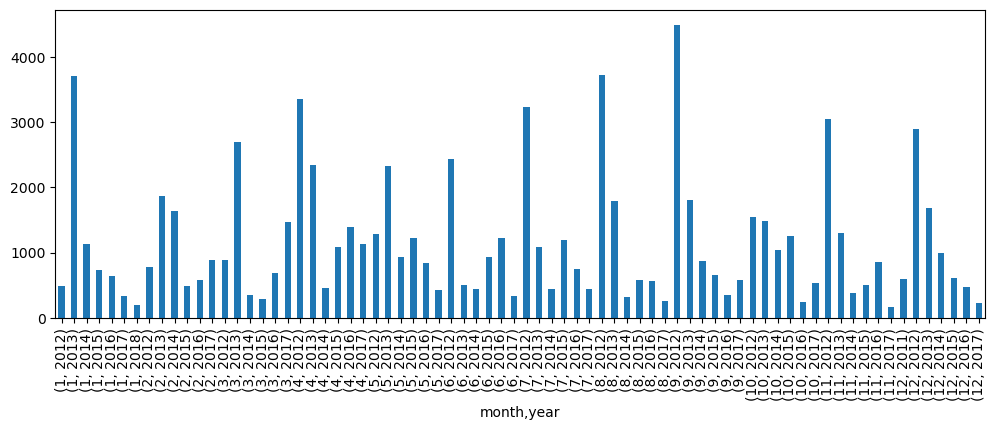

In [15]:
%matplotlib inline

# Create a column that will store the month
data['month'] =data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

# Group by the month and year and count the pull requests
counts =data.groupby(['month','year'])['pid'].count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

<a id = "5" ></a>
# <span style="  color:#FFA500;font-family:serif; font-size:28px;"> 5. Y a-t-il de la camaraderie dans le projet ?</span>

<p>La structure organisationnelle varie d'un projet à l'autre, et elle peut influencer votre réussite en tant que contributeur. Un projet dont la communauté est très réduite n'est peut-être pas le meilleur projet sur lequel commencer à travailler. La petite communauté peut indiquer une barrière d'entrée élevée. Plusieurs facteurs peuvent en être la cause, notamment une communauté réticente à accepter les demandes de retrait de la part d'"étrangers", la difficulté de travailler avec la base de code, etc. Cependant, une communauté importante peut servir d'indicateur que le projet accepte régulièrement des demandes de retrait de la part de nouveaux contributeurs. Un tel projet est un bon point de départ.</p>
<p> Afin d'évaluer la dynamique de la communauté, nous allons tracer un histogramme du nombre de pull requests soumises par chaque utilisateur. Une distribution qui montre qu'il y a peu de personnes qui ne contribuent qu'à un petit nombre de pull requests peut être utilisée comme un indicateur que le projet n'est pas accueillant pour les nouveaux contributeurs.</p>

array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

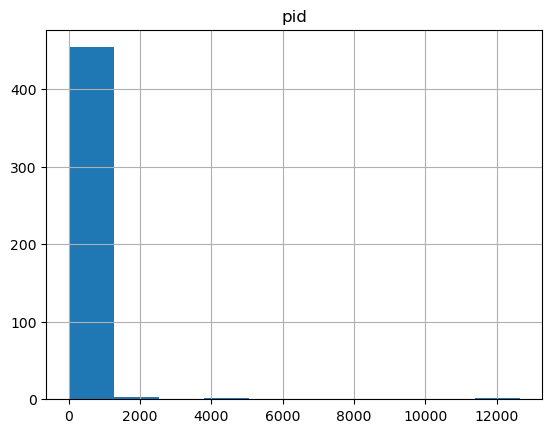

In [16]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby('user').agg({'pid': 'count'})

# Plot the histogram
by_user.hist()

<a id = "6" ></a>
# <span style="  color:#FFA500;font-family:serif; font-size:28px;"> 6.Quels fichiers ont été modifiés dans les dix dernières demandes de retrait ? </span>

<p>Choisir le bon endroit pour apporter une contribution est aussi important que de choisir le projet auquel on souhaite contribuer. Certaines parties du code peuvent être stables, d'autres peuvent être mortes. Contribuer à cet endroit n'aura peut-être pas le plus grand impact. Il est donc important de comprendre les parties du système qui ont été récemment modifiées. Cela nous permet d'identifier les zones "chaudes" du code où la plupart des activités ont lieu. Se concentrer sur ces parties n'est peut-être pas l'utilisation la plus efficace de notre temps.</p>

In [17]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by = 'date').tail(10)
last_10

# Join the two data sets
joined_pr = pull_files.merge(last_10, on='pid')

# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

<a id = "6" ></a>
# <span style="  color:#FFA500;font-family:serif; font-size:28px;"> 7.Qui a fait le plus de pull requests sur un fichier donné ? </span>

<p>Lorsque nous contribuons à un projet, nous pouvons avoir besoin de conseils. Nous pouvons avoir besoin d'informations concernant la base de code. Il est important d'adresser toute question à la bonne personne. Les contributeurs aux projets open source ont généralement d'autres emplois de jour, leur temps est donc limité. Il est important d'adresser nos questions aux bonnes personnes. Une façon d'identifier la bonne cible pour nos demandes est d'utiliser l'historique de leurs contributions.</p>
<p>Nous avons identifié <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> comme ayant été récemment modifié. Nous sommes intéressés par les trois principaux développeurs qui ont modifié ce fichier. Ces développeurs sont les plus susceptibles d'avoir la meilleure compréhension du code.</p>

In [18]:
# # This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the pull requests that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


<a id = "8" ></a>
# <span style="  color:#FFA500;font-family:serif; font-size:28px;"> 8. Qui a fait les dix dernières pull requests sur un fichier donné ?</span>

<p> Les projets open source souffrent de la fluctuation des membres. Cela rend le problème de trouver la bonne personne plus difficile : la personne doit être bien informée. <em>et</em> être encore impliqué dans le projet. Une personne qui a beaucoup contribué dans le passé peut ne plus être disponible (ou désireuse) d'aider. Pour mieux comprendre, nous devons examiner l'histoire plus récente de cette partie particulière du système.</p>
<p>Comme dans la tâche précédente, nous nous pencherons sur l'histoire de l'UE. <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.</p>

In [19]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

<a id = "9" ></a>
# <span style="  color:#FFA500; font-family:serif; font-size:28px;">9. Les pull requests de deux développeurs particuliers</span>


<p>Maintenant que nous avons identifié deux contacts potentiels dans les projets, nous devons trouver la personne qui a été la plus impliquée dans le projet récemment. Cette personne est la plus à même de répondre à nos questions. Pour chaque année civile, nous souhaitons connaître le nombre de pull requests que les auteurs ont soumis. Cela nous donnera une image de haut niveau de la tendance de leur contribution au projet.</p>

<AxesSubplot:xlabel='date'>

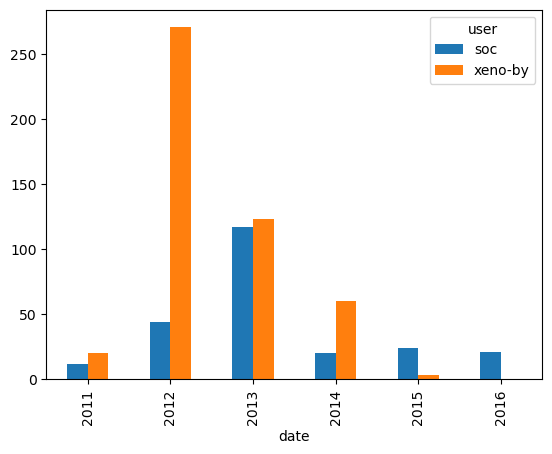

In [20]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')

<a id = "10" ></a>
# <span style="  color:#FFA500;font-family:serif; font-size:28px;"> 10.Visualiser les contributions de chaque développeur </span>

<p>Comme mentionné précédemment, il est important de faire une distinction entre les niveaux d'expertise et de contribution globaux et les niveaux de contribution à un niveau plus granulaire (fichier, sous-module, etc.) Dans notre cas, nous voulons voir lequel de nos deux développeurs d'intérêt a le plus d'expérience avec le code d'un fichier donné. Nous mesurerons l'expérience par le nombre de pull requests soumises qui affectent ce fichier et la date à laquelle ces pull requests ont été soumises.</p>

<AxesSubplot:xlabel='date'>

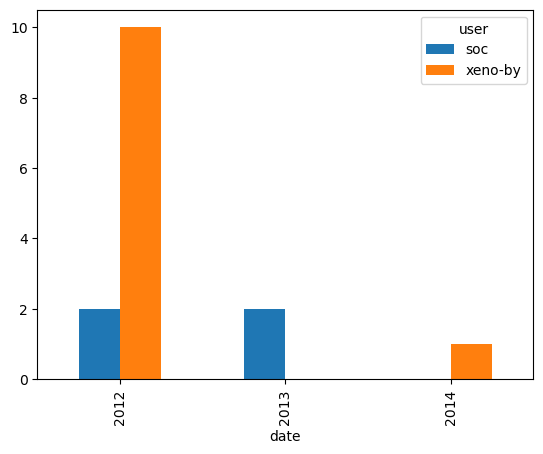

In [21]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Merge DataFrames and select the pull requests by the author
by_author =data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')